In [10]:
import sys
import cv2
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from matplotlib import pyplot as plt  

In [11]:
image = cv2.imread('sampel.jpeg',0)
image = cv2.resize(image,(800,800))

In [12]:
def kirsch(image):
    x,y = image.shape
    list=[]
    kirsch = np.zeros((x,y))
    for i in range(2,x-1):
        for j in range(2,y-1):
            d1 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d2 = np.square((-3) * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d3 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d4 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d5 = np.square(5 * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d6 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d7 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] - 
                  3 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d8 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            
            list=[d1, d2, d3, d4, d5, d6, d7, d8]
            kirsch[i,j]= int(np.sqrt(max(list)))
                         
    for i in range(x):
        for j in range(y):
            if kirsch[i,j]>127:
                kirsch[i,j]=255
            else:
                kirsch[i,j]=0
    return kirsch

In [13]:
def robinson(image):
    m,n = image.shape
    list=[]
    robinson = np.zeros((m,n))
    for i in range(2,m-1):
        for j in range(2,n-1):
            m1 = np.square((-1) * image[i - 1, j - 1] + 1 * image[i - 1, j + 1] - 
                  2 * image[i, j - 1] + 2 * image[i, j + 1] - 1 * image[i + 1, j - 1] + 1 * image[i + 1, j + 1])
            
            m2 = np.square(1 * image[i - 1, j] + 2 * image[i - 1, j + 1] -
                  1 * image[i, j - 1] + 1 * image[i, j + 1] - 2 * image[i + 1, j - 1] - 1 * image[i + 1, j])
            
            m3 = np.square(1 * image[i - 1, j - 1] + 2 * image[i - 1, j] + 1 * image[i - 1, j + 1] -
                  1 * image[i + 1, j - 1] - 2 * image[i + 1, j] - 1 * image[i + 1, j + 1])
            
            m4 = np.square(2 * image[i - 1, j - 1] + 1 * image[i - 1, j] + 1 * image[i, j - 1] - 
                  1 * image[i, j + 1] - 1 * image[i + 1, j] - 2 * image[i + 1, j + 1])
            
            m5 = np.square(1 * image[i - 1, j - 1] - 1 * image[i - 1, j + 1] + 2 * image[i, j - 1] - 
                  2 * image[i, j + 1] + 1 * image[i + 1, j - 1] - 1 * image[i + 1, j + 1])
            
            m6 = np.square((-1) * image[i - 1, j] - 2 * image[i - 1, j + 1] + 1 * image[i, j - 1] - 
                  1 * image[i, j + 1] + 2 * image[i + 1, j - 1] + 1 * image[i + 1, j])
            
            m7 = np.square((-1) * image[i - 1, j - 1] - 2 * image[i - 1, j] - 1 * image[i - 1, j + 1] +
                  1 * image[i + 1, j - 1] + 2 * image[i + 1, j] + 1 * image[i + 1, j + 1])
            
            m8 = np.square((-2) * image[i - 1, j - 1] - 1 * image[i - 1, j] - 1 * image[i, j - 1] + 
                  1 * image[i, j + 1] + 1 * image[i + 1, j] + 2 * image[i + 1, j + 1])

            list=[m1, m2, m3, m4, m5, m6, m7, m8]
            robinson[i,j]= int(np.sqrt(max(list)))
                         
    for i in range(m):
        for j in range(n):
            if robinson[i,j]>127:
                robinson[i,j]=255
            else:
                robinson[i,j]=0
    return robinson

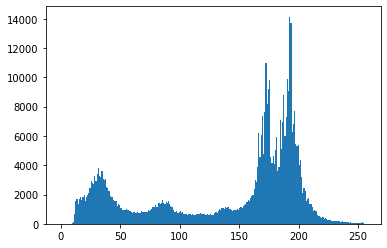

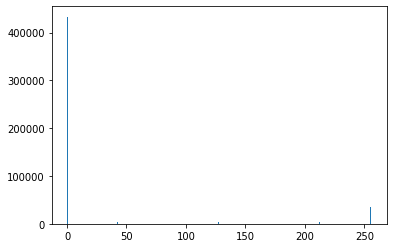

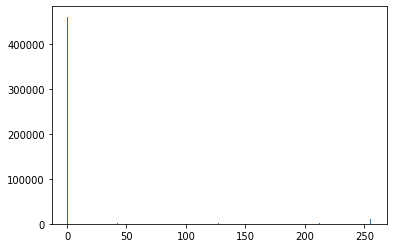

In [15]:
output1 = kirsch(image)
output2 = robinson(image)

image = cv2.resize(image, (800, 600))
output1 = cv2.resize(output1, (800, 600))
output2 = cv2.resize(output2, (800, 600))

plt.hist(image.ravel(),256,[0,256]);
plt.show()
plt.hist(output1.ravel(),256,[0,256]); 
plt.show()
plt.hist(output2.ravel(),256,[0,256]); 
plt.show()



In [16]:
cv2.imshow('Original Image', image)
cv2.imshow('Output Kirsch', output1)
cv2.imshow('Output Robinson', output2)
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()